In [136]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.compat import lzip
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
import statsmodels.iolib.table as table

from random import gauss
from random import seed
# from pandas.tools.plotting import autocorrelation_plot
from pandas.plotting import autocorrelation_plot
from matplotlib import pyplot

In [91]:
dat = sm.datasets.get_rdataset("Guerry", "HistData").data
dat

,dept,Region,Department,Crime_pers,Crime_prop,Literacy,Donations,Infants,Suicides,MainCity,...,Crime_parents,Infanticide,Donation_clergy,Lottery,Desertion,Instruction,Prostitutes,Distance,Area,Pop1831
0,1,E,Ain,28870,15890,37,5098,33120,35039,2:Med,...,71,60,69,41,55,46,13,218.372,5762,346.03
1,2,N,Aisne,26226,5521,51,8901,14572,12831,2:Med,...,4,82,36,38,82,24,327,65.945,7369,513.00
2,3,C,Allier,26747,7925,13,10973,17044,114121,2:Med,...,46,42,76,66,16,85,34,161.927,7340,298.26
3,4,E,Basses-Alpes,12935,7289,46,2733,23018,14238,1:Sm,...,70,12,37,80,32,29,2,351.399,6925,155.90
4,5,E,Hautes-Alpes,17488,8174,69,6962,23076,16171,1:Sm,...,22,23,64,79,35,7,1,320.280,5549,129.10
5,7,S,Ardeche,9474,10263,27,3188,42117,52547,1:Sm,...,76,47,67,70,19,62,1,279.413,5529,340.73
6,8,N,Ardennes,35203,8847,67,6400,16106,26198,2:Med,...,53,85,49,31,62,9,83,105.694,5229,289.62
7,9,S,Ariege,6173,9597,18,3542,22916,123625,1:Sm,...,74,28,63,75,22,77,3,385.313,4890,253.12
8,10,E,Aube,19602,4086,59,3608,18642,10989,2:Med,...,77,54,9,28,86,15,207,83.244,6004,246.36
9,11,S,Aude,15647,10431,34,2582,20225,66498,2:Med,...,80,35,27,50,63,48,1,370.949,6139,270.13


In [92]:
results = smf.ols('Lottery ~ Literacy + np.log(Pop1831)', data=dat).fit()
results.params

Intercept          246.434135
Literacy            -0.488923
np.log(Pop1831)    -31.311392
dtype: float64

In [93]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Lottery   R-squared:                       0.348
Model:                            OLS   Adj. R-squared:                  0.333
Method:                 Least Squares   F-statistic:                     22.20
Date:                Mon, 11 Jun 2018   Prob (F-statistic):           1.90e-08
Time:                        13:54:23   Log-Likelihood:                -379.82
No. Observations:                  86   AIC:                             765.6
Df Residuals:                      83   BIC:                             773.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         246.4341     35.233      6.995      0.000     176.358     316.510
Literacy           -0.4889      0.128     -3.832      0.000      -0.743      -0.235
np.log(Pop1831)   -31.3114      5.977     -5.239      0.000     -43.199     -19.424
==============================================================================
Omnibus:                        3.713   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.156   Jarque-Bera (JB):                3.394
Skew:                          -0.487   Prob(JB):                        0.183
Kurtosis:                       3.003   Cond. No.                         702.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [94]:
# dir(results) 

In [7]:
nobs = 100
X1 = np.random.random((nobs, 2))
X = sm.add_constant(X1)
beta = [1, .1, .5]

e = np.random.random(nobs)
y = np.dot(X, beta) + e
results = sm.OLS(y, X).fit()


In [8]:
#type(y)==numpy.ndarray
len(X)

100

In [137]:
# # sms.cov_white_simple(results)
# name = ['Jarque-Bera', 'Chi^2 two-tail prob.', 'Skew', 'Kurtosis']
# test = sms.jarque_bera(results.resid)

# # lzip(name, test)
# # t=zip(name, test);next(t)
# # from statsmodels.graphics.regressionplots import plot_leverage_resid2
# # print(plot_leverage_resid2(results))
# np.linalg.cond(results.model.exog)
# # results.model.exog

# name = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
# test = sms.het_breuschpagan(results.resid, results.model.exog)
# lzip(name, test)

# # Goldfeld-Quandt test
# name = ['F statistic', 'p-value']
# test = sms.het_goldfeldquandt(results.resid, results.model.exog)
# lzip(name, test)


# # ## Linearity
# # Harvey-Collier multiplier test for Null hypothesis that the linear specification is correct:
# name = ['t value', 'p value']
# test = sms.linear_harvey_collier(results)
# test#Ttest_1sampResult(statistic=-1.0796490077784473, pvalue=0.2834639247558297)


# White's Lagrange Multiplier Test for Heteroscedasticity
name = ['lagrange multiplier statistic', 'p-value','fvalue','f_pvalue']
test = sms.het_white(results.resid, results.model.exog)
lzip(name, test)
# sms.het_white(resid=results.resid,exog=results.model.exog)
# (8.484940824652101,
#  0.13145740771023087,
#  1.7513894027653538,
#  0.13248065708030737)
# sms.het_white??
# sms.durbin_watson(results.resid)#2.0192168224545086
# dir(sms.diagnostic)
table.SimpleTable(lzip(name, test))


lagrange multiplier statistic,8.484940824652101
p-value,0.13145740771023087
fvalue,1.7513894027653538
f_pvalue,0.13248065708030737


In [139]:
#现在我们要进一步检验数据是不是适合使用OLS，我们暂且先检验一下数据是否为线性，虚无假设是线性的，采用Rainbow test
rb=sms.linear_rainbow(results);
rb

(1.087214173347913, 0.3960381923575505)

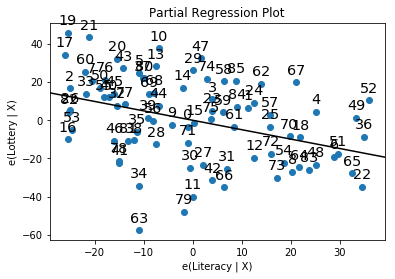

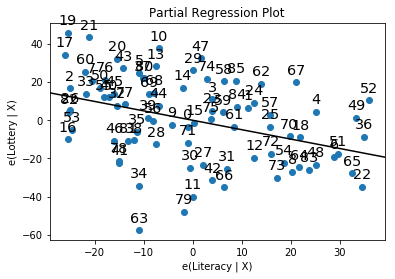

In [155]:
# 'Lottery ~ Literacy + np.log(Pop1831)'
# sm.graphics.plot_partregress("Lottery","Literacy",exog_others=["Pop1831"],data=dat)
# sm.graphics.plot_partregress("Lottery","Literacy",exog_others=["np.log(Pop1831)"],data=dat)
# sm.graphics.plot_partregress("Lottery","Literacy",[],data=dat)
# sm.graphics.plot_partregress("Lottery","Literacy",["np.log(Pop1831)","Pop1831"],data=dat)

In [87]:
# l=[3,4,5]
# dir(l)
from linearmodels import FamaMacBeth
date_index=pd.period_range("2018-1-1",periods=100).astype(np.datetime64)
y1=pd.DataFrame(y,index=date_index)
x1=pd.DataFrame(X1,index=date_index)
seq=list(range(len(date_index)))
y2=y1.set_index([seq,date_index])
x2=x1.set_index([seq,date_index])
x2
# y2=y2.to_panel()
# x2=x2.to_panel()
mod = FamaMacBeth(y2, x2)
res = mod.fit()
# res

# mod = FamaMacBeth.from_formula('y ~ 1 + x1', panel_data)

ZeroDivisionError: float division by zero

In [88]:
#设置索引要用set_index
# y3=y1.reindex(index=[seq,date_index],columns=[0],fill_value=[2,3,3])
# y3=y1.reindex(index=[seq,date_index],columns=[0],copy=True)
# y1.values
# y1.set_index([seq,date_index])


NameError: name 'sms' is not defined

In [ ]:
y2=y1.reindex

In [ ]:
# # df.reset_index实例
# index = pd.MultiIndex.from_tuples([('bird', 'falcon'),
#                                     ('bird', 'parrot'),
#                                     ('mammal', 'lion'),
#                                     ('mammal', 'monkey')],
#                                    names=['class', 'name'])

# columns = pd.MultiIndex.from_tuples([('speed', 'max'),
#                                       ('species', 'type')])

# df = pd.DataFrame([(389.0, 'fly'),
#                     ( 24.0, 'fly'),
#                     ( 80.5, 'run'),
#                     (np.nan, 'jump')],
#                    index=index,
#                    columns=columns)

# df
# df.reset_index(level='class',drop=True)

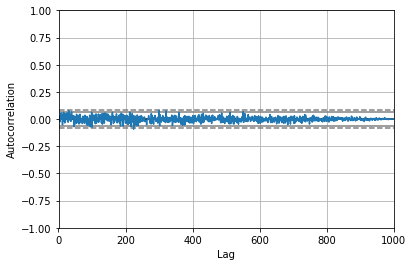

In [24]:
# seed random number generator
seed(1)
# create white noise series
# series = {i:gauss(0.0, 1.0) for i in range(1000)}
# series = (gauss(0.0, 1.0) for i in range(1000))
# next(series)
series = [gauss(0.0, 1.0) for i in range(1000)]
series = pd.Series(series)
# summary stats
# print(series.describe())
# line plot
# series.plot()
# pyplot.show()
# # histogram plot
# series.hist()
# pyplot.show()
# # autocorrelation
autocorrelation_plot(series)
# pyplot.show()
